In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("duyguanalizi.csv",encoding="ISO-8859-9")

In [3]:
df.shape

(1000, 2)

In [4]:
df.head()

,Yorum,Duygu
0,Bu fiyat bandında alınabilecek en iyi fiyat pe...,1
1,Ürün harika paketlenmişti Kargo evime söylend...,1
2,Gerçekten bu zamanda alınabilecek fiyat perfor...,1
3,Ürünü indirimden aldım fakat ışık hüzmesi ve 2...,0
4,Ürün elime yanlış geldi ürünü değiştireceğiz ...,0


In [5]:
df.isnull().sum() 

Yorum    0
Duygu    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Yorum   1000 non-null   object
 1   Duygu   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
df["Duygu"].value_counts()

Duygu
1    500
0    500
Name: count, dtype: int64

In [8]:
df.drop_duplicates().shape

(901, 2)

In [9]:
df.groupby("Duygu").aggregate(["min","max"]).unstack()

            Duygu
Yorum  min  0        09 07 2023 tarihinde hepsiburada com dan 26000...
            1        "MSI laptop beklediğim gibi geldi  teşekkür ed...
       max  0        şarj sorunu oluyor  şarj aleti oldukça kötü  e...
            1        şuan birkaç üründe ve oyunda test ettim  sorun...
dtype: object

In [10]:
import seaborn as sns

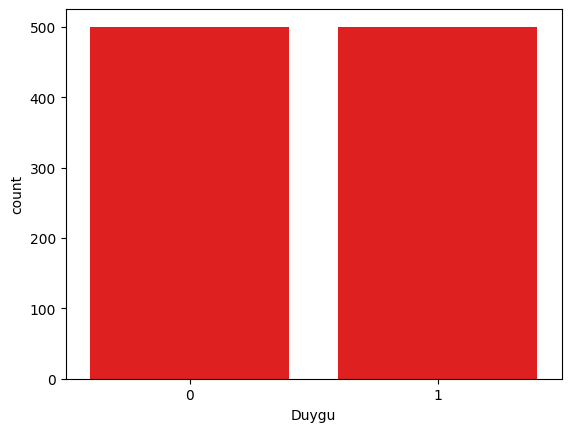

In [11]:
sns.countplot(x=df["Duygu"],color="red");

In [12]:
x=df["Yorum"]
y=df["Duygu"]

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer=CountVectorizer(ngram_range=(1,2))

In [17]:
x_train_vectorized=vectorizer.fit_transform(x_train)
x_test_vectorized=vectorizer.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log=LogisticRegression(solver="liblinear")
log_model=log.fit(x_train_vectorized,y_train)

In [20]:
from sklearn.metrics import accuracy_score,classification_report

In [21]:
y_pred=log_model.predict(x_test_vectorized)

In [22]:
log_acc=accuracy_score(y_test,y_pred)

In [23]:
log_acc

0.865

In [24]:
log_acc_cv=cross_val_score(log_model,x_test_vectorized,y_test,cv=10).mean()

In [25]:
log_acc_cv

0.8150000000000001

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
nb=MultinomialNB()
nb_model=nb.fit(x_train_vectorized,y_train)

In [28]:
y_pred_nb=nb_model.predict(x_test_vectorized)

In [29]:
nb_acc=accuracy_score(y_test,y_pred_nb)

In [30]:
nb_acc

0.9

In [31]:
nb_acc_cv=cross_val_score(nb_model,x_test_vectorized,y_test,cv=10).mean()

In [32]:
nb_acc_cv

0.82

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn_model=KNeighborsClassifier().fit(x_train_vectorized,y_train)

In [35]:
y_pred_knn=knn_model.predict(x_test_vectorized)

In [36]:
knn_acc=accuracy_score(y_test,y_pred_knn)
knn_acc

0.6

In [37]:
knn_acc_cv=cross_val_score(knn_model,x_test_vectorized,y_test,cv=10).mean()

In [38]:
knn_acc_cv

0.495

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
cart_model=DecisionTreeClassifier().fit(x_train_vectorized,y_train)

In [41]:
y_pred_cart=cart_model.predict(x_test_vectorized)

In [42]:
cart_acc=accuracy_score(y_test,y_pred_cart)
cart_acc

0.77

In [43]:
cart_acc_cv=cross_val_score(cart_model,x_test_vectorized,y_test,cv=10).mean()

In [44]:
cart_acc_cv

0.76

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_model=RandomForestClassifier().fit(x_train_vectorized,y_train)

In [47]:
y_pred_rf=rf_model.predict(x_test_vectorized)

In [48]:
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_acc

0.86

In [49]:
rf_acc_cv=cross_val_score(rf_model,x_test_vectorized,y_test,cv=10).mean()

In [50]:
rf_acc_cv

0.7899999999999999

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbm_model=GradientBoostingClassifier().fit(x_train_vectorized,y_train)

In [53]:
y_pred_gbm=gbm_model.predict(x_test_vectorized)

In [54]:
gbm_acc=accuracy_score(y_test,y_pred_gbm)
gbm_acc

0.815

In [55]:
gbm_acc_cv=cross_val_score(gbm_model,x_test_vectorized,y_test,cv=10).mean()

In [56]:
gbm_acc_cv

0.7949999999999999

In [57]:
from xgboost import XGBClassifier

In [58]:
xgb_model=XGBClassifier().fit(x_train_vectorized,y_train)

In [59]:
y_pred_xgb=xgb_model.predict(x_test_vectorized)

In [60]:
xgb_acc=accuracy_score(y_test,y_pred_xgb)
xgb_acc

0.82

In [61]:
xgb_acc_cv=cross_val_score(xgb_model,x_test_vectorized,y_test,cv=10).mean()

In [62]:
xgb_acc_cv

0.76

In [63]:
from sklearn.svm import SVC

In [64]:
svm_lin_model=SVC(kernel="linear").fit(x_train_vectorized,y_train)

In [65]:
y_pred_svm_lin=svm_lin_model.predict(x_test_vectorized)

In [66]:
svm_lin_acc=accuracy_score(y_test,y_pred_svm_lin)
svm_lin_acc

0.815

In [67]:
svm_lin_acc_cv=cross_val_score(svm_lin_model,x_test_vectorized,y_test,cv=10).mean()

In [68]:
svm_lin_acc_cv

0.7249999999999999

In [69]:
svm_rbf_model=SVC(kernel="rbf").fit(x_train_vectorized,y_train)

In [70]:
y_pred_svm_rbf=svm_rbf_model.predict(x_test_vectorized)

In [71]:
svm_rbf_acc=accuracy_score(y_test,y_pred_svm_rbf)
svm_rbf_acc

0.835

In [72]:
svm_rbf_acc_cv=cross_val_score(svm_rbf_model,x_test_vectorized,y_test,cv=10).mean()

In [73]:
svm_rbf_acc_cv

0.76

In [74]:
modeller=["log","nb","svm lin","svm rbf","knn","cart","rf","gbm","xgbm"]
başarı=[log_acc,nb_acc,svm_lin_acc,svm_rbf_acc,knn_acc,cart_acc,rf_acc,gbm_acc,xgb_acc]
valide_başarı=[log_acc_cv,nb_acc_cv,svm_lin_acc_cv,svm_rbf_acc_cv,knn_acc_cv,cart_acc_cv,rf_acc_cv,gbm_acc_cv,xgb_acc_cv]

In [75]:
d={"model":modeller,
   "başarı":başarı,
   "valide başarı":valide_başarı}

In [76]:
d=pd.DataFrame(d,columns=["model","başarı","valide başarı"])

In [77]:
d

,model,başarı,valide başarı
0,log,0.865,0.815
1,nb,0.900,0.820
2,svm lin,0.815,0.725
3,svm rbf,0.835,0.760
4,knn,0.600,0.495
5,cart,0.770,0.760
6,rf,0.860,0.790
7,gbm,0.815,0.795
8,xgbm,0.820,0.760


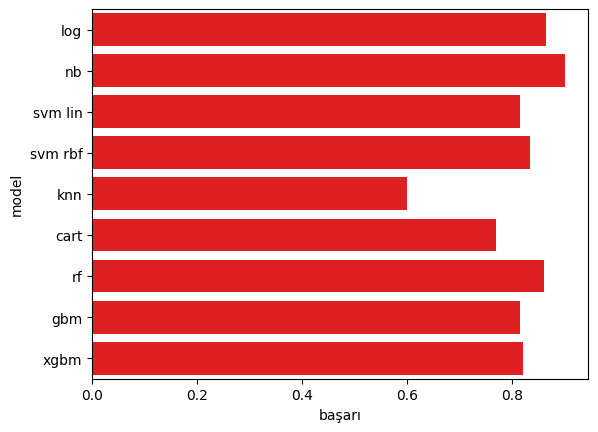

In [78]:
sns.barplot(y=d["model"],x=d["başarı"],color="red");

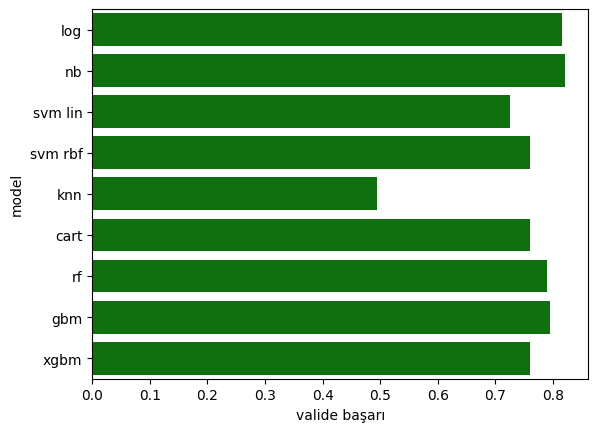

In [79]:
sns.barplot(x=d["valide başarı"],y=d["model"],color="green");

In [80]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'model_acc_cv')

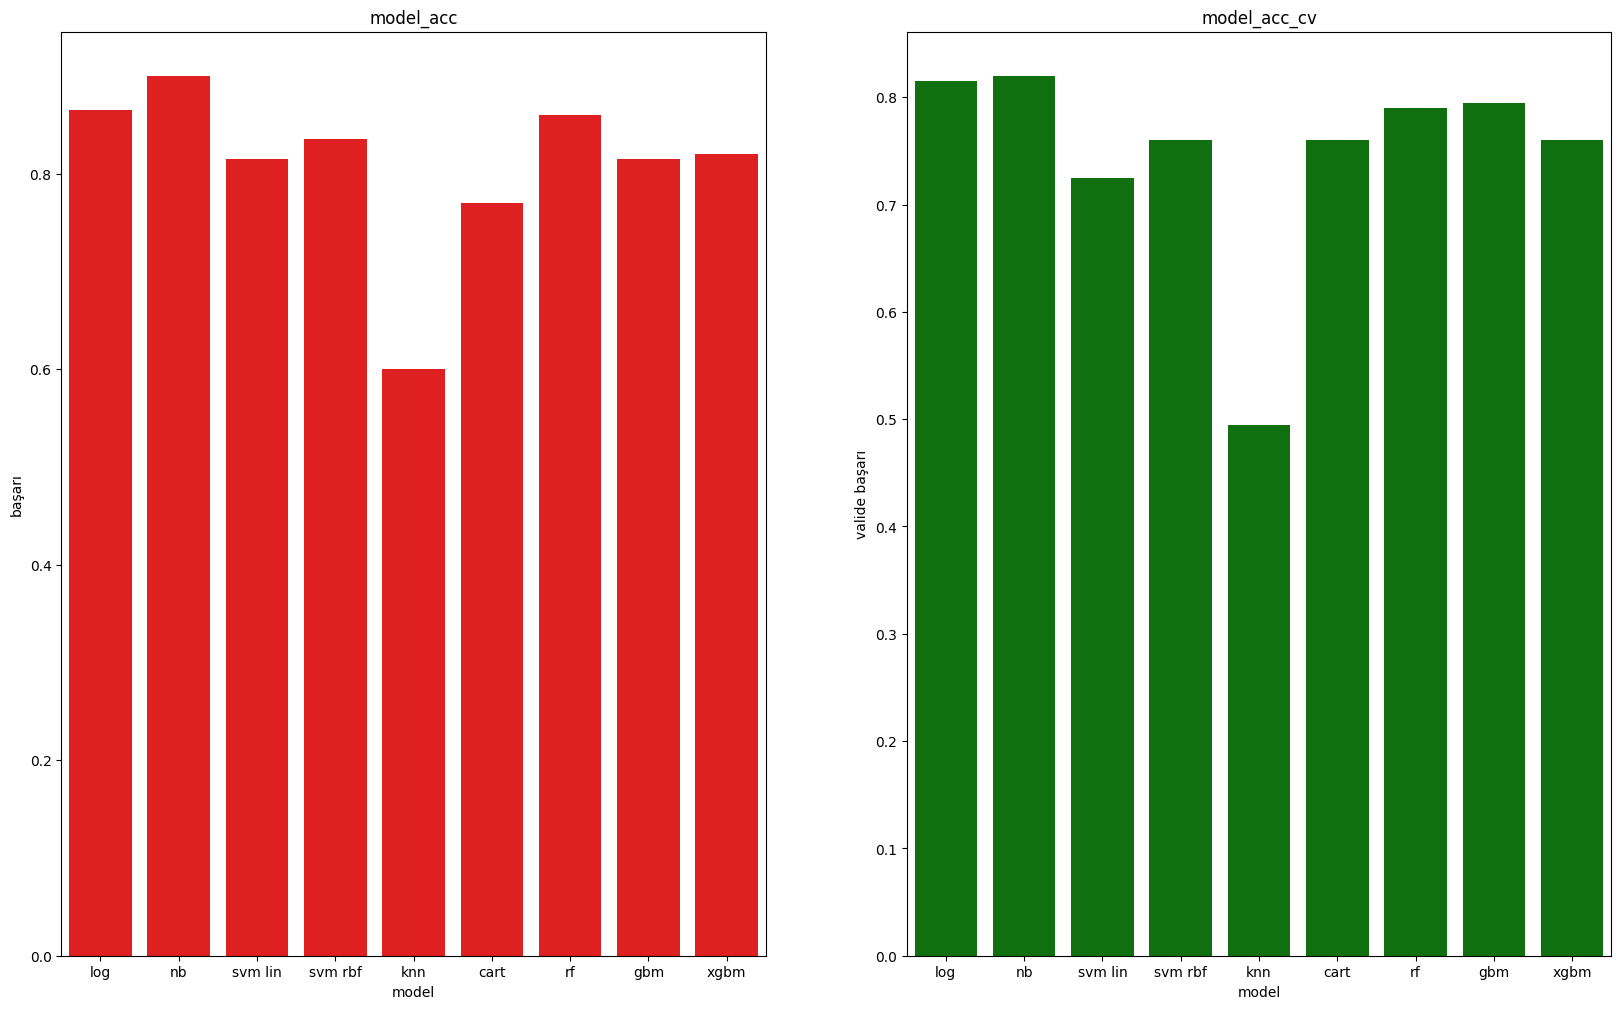

In [81]:
plt.figure(figsize=((20,12)))
plt.subplot(1,2,1)
sns.barplot(x=d["model"],y=d["başarı"],color="red");
plt.title("model_acc")
plt.subplot(1,2,2)
sns.barplot(x=d["model"],y=d["valide başarı"],color="green");
plt.title("model_acc_cv")

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
gbm_model=GradientBoostingClassifier(random_state=42)

In [85]:
gbm_params={"n_estimators":[100,200,300],
           "max_depth":[2,3,5],
           "learning_rate":[0.01,0.05,0.1],
           "subsample":[0.8,1.0]}

In [86]:
gbm_cv=GridSearchCV(gbm_model,gbm_params,scoring="accuracy",cv=5,n_jobs=-1,verbose=2)

In [89]:
gbm_cv.fit(x_train_vectorized,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [90]:
gbm_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

In [91]:
gbm_tune=GradientBoostingClassifier(n_estimators=300,max_depth=3,learning_rate=0.05,subsample=0.8,random_state=42)

In [92]:
gbm_tune_model=gbm_tune.fit(x_train_vectorized,y_train)

In [93]:
y_pred_gbm_tune=gbm_tune_model.predict(x_test_vectorized)

In [94]:
gbm_tune_acc=accuracy_score(y_pred_gbm_tune,y_test)

In [95]:
gbm_tune_acc

0.85

In [96]:
gbm_tune_acc_cv=cross_val_score(gbm_tune_model,x_test_vectorized,y_test,cv=10).mean()

In [97]:
gbm_tune_acc_cv

0.8000000000000002

In [98]:
model_tuned=nb_model

In [100]:
model_tuned.predict(x_test_vectorized)[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [101]:
import joblib

In [103]:
joblib.dump(model_tuned,"model_tuned.pkl")

['model_tuned.pkl']

In [104]:
model=joblib.load("model_tuned.pkl")